# Analyzing FIFA World Cup Data

### 1. Load and Explore the Dataset

In [101]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Loading the dataset

world_cups_df = pd.read_csv('WorldCups.csv')
world_cup_matches_df = pd.read_csv('WorldCupMatches.csv')
world_cup_players_df = pd.read_csv('WorldCupPlayers.csv')

#### (i) World Cups Dataset

In [41]:
world_cups_df.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [42]:
# Total Rows & Columns

world_cups_df.shape

(20, 10)

In [43]:
# General overview of the dataset

world_cups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [44]:
# Basic Statistics (Overview of the numerical columns in the dataset)

world_cups_df.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


#### (ii) World Cup Matches Dataset

In [45]:
world_cup_matches_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [46]:
# Total Rows & Columns

world_cup_matches_df.shape

(4572, 20)

In [47]:
# General overview of the dataset

world_cup_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [48]:
# Basic Statistics (Overview of the numerical columns in the dataset)

world_cup_matches_df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


#### (iii) World Cup Players Dataset

In [49]:
world_cup_players_df.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [50]:
# Total Rows & Columns

world_cup_players_df.shape

(37784, 9)

In [51]:
# General overview of the dataset

world_cup_players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [52]:
# Basic Statistics (Overview of the numerical columns in the dataset)

world_cup_players_df.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


### 2. Data Cleaning and Transformation

#### (i) World Cups Dataset

In [53]:
# Checks for missing values

world_cups_df.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

- The output shows that there are no missing values in the dataset.

In [54]:
# Checking for duplicates

if world_cups_df.duplicated().sum() > 0:  
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


- Since our dataset contains no duplicate values, so we are good to go.
- If the dataset contained any duplicate values we would have used
    `df.drop_duplicates(inplace=True)`       # To Drop duplicates if any

In [55]:
# Cleaning 'Attendance' column data

world_cups_df['Attendance'] = world_cups_df['Attendance'].str.replace('.', '').astype(int)

In [56]:
world_cups_df.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


#### (ii) World Cup Matches Dataset

In [57]:
# Checks for missing values

world_cup_matches_df.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

- The output shows that the columns listed above have `3,720` missing values out of **4,572 total rows**. 
- While `Attendance` column has `3,722` missing values.

In [67]:
# Droping null values

world_cup_matches_df.dropna(subset=['Year'], inplace=True)
world_cup_matches_df['Attendance'] = world_cup_matches_df['Attendance'].fillna(0).astype(int)


In [68]:
world_cup_matches_df.shape

(852, 20)

In [69]:
world_cup_matches_df.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

#### (iii) World Cup Players Dataset

In [70]:
# Checks for missing values

world_cup_players_df.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

- The output shows that the column **Position** has `33641` missing values.
- While the column **Event** has `28715`  missing values outof 37784 total rows.

In [71]:
# Fill missing values

world_cup_players_df['Position'].fillna('Unknown', inplace=True)
world_cup_players_df['Event'].fillna('No Event', inplace=True)

In [72]:
world_cup_players_df

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,No Event
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,No Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,Unknown,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,Unknown,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,Unknown,No Event
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,Unknown,No Event
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,Unknown,No Event
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,Unknown,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,Unknown,No Event


In [73]:
world_cup_players_df.isnull().sum()

RoundID          0
MatchID          0
Team Initials    0
Coach Name       0
Line-up          0
Shirt Number     0
Player Name      0
Position         0
Event            0
dtype: int64

- Since now we have zero missing values so we are good to go.

### 3. Exploratory Data Analysis (EDA)

#### (i) Historical Trends:

**i-(a) Number of Total Goals Scored in all World Cups**

In [122]:
total_goals_scored = world_cups_df['GoalsScored'].sum()
print("Number of Total Goals Scored in all World Cups:", total_goals_scored)

Number of Total Goals Scored in all World Cups: 2379


**i-(b) Average Goals Scored per Match**

In [123]:
total_matches_played = world_cups_df['MatchesPlayed'].sum()
average_goals_per_match = total_goals_scored / total_matches_played
print("Average Goals Scored per Match:", average_goals_per_match)

Average Goals Scored per Match: 2.8456937799043063


**i-(c) Average Goals Scored per Match by Year**

In [131]:
# Calculate total goals and matches played by year
goals_per_year = world_cups_df.groupby('Year')['GoalsScored'].sum()
matches_per_year = world_cups_df.groupby('Year')['MatchesPlayed'].sum()

# Calculate average goals per match by year
average_goals_per_match_by_year = goals_per_year / matches_per_year
print("Average Goals Scored per Match by Year:\n")
print(average_goals_per_match_by_year)

Average Goals Scored per Match by Year:

Year
1930    3.888889
1934    4.117647
1938    4.666667
1950    4.000000
1954    5.384615
1958    3.600000
1962    2.781250
1966    2.781250
1970    2.968750
1974    2.552632
1978    2.684211
1982    2.807692
1986    2.538462
1990    2.211538
1994    2.711538
1998    2.671875
2002    2.515625
2006    2.296875
2010    2.265625
2014    2.671875
dtype: float64


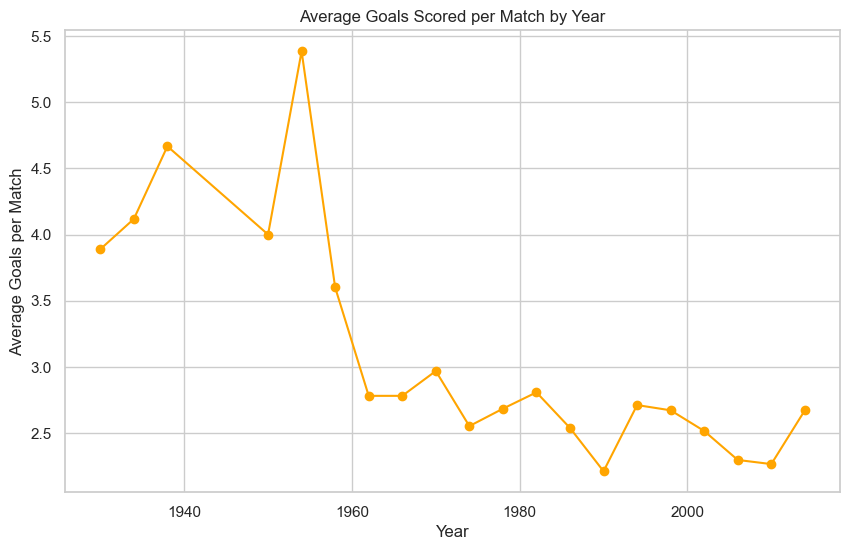

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(average_goals_per_match_by_year.index, average_goals_per_match_by_year.values, marker='o', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.title('Average Goals Scored per Match by Year')
plt.grid(True)
plt.show()

**i-(d) Number of Matches Played Over the Years**

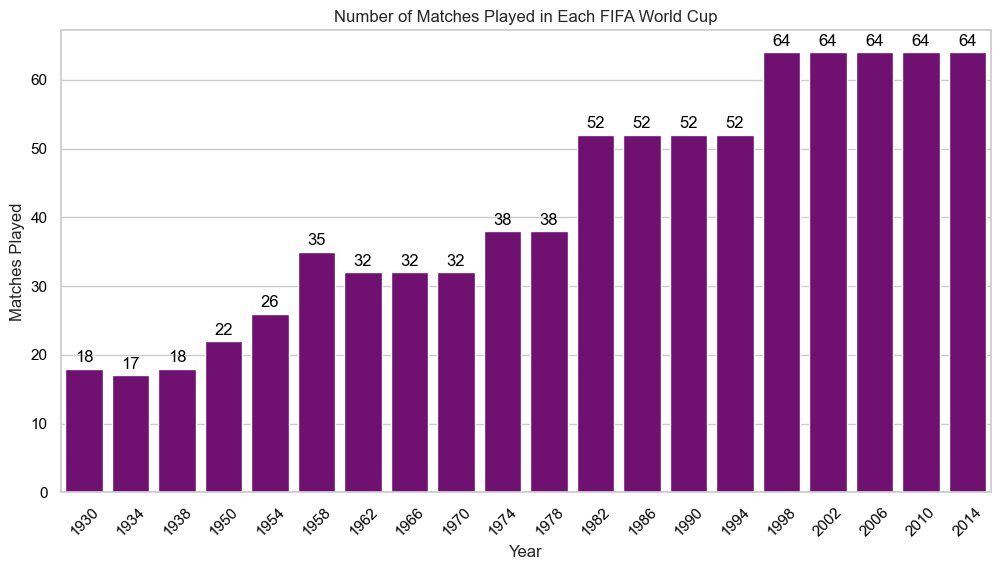

In [191]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=world_cups_df, x='Year', y='MatchesPlayed', color='purple')

# Adding labels on top of bars
for b in bars.patches:
    bars.annotate(format(b.get_height(), '.0f'),
                  (b.get_x() + b.get_width() / 2., b.get_height()),
                  ha='center', va='center', size=12, color='black', xytext=(0, 8),
                  textcoords='offset points')

plt.title('Number of Matches Played in Each FIFA World Cup')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')
plt.show()

**i-(e) Top 5 years with the highest goals scored**

In [109]:
top_goals = world_cups_df[['Year', 'GoalsScored']].sort_values(by='GoalsScored', ascending=False).head(5)
print(top_goals)

    Year  GoalsScored
19  2014          171
15  1998          171
16  2002          161
17  2006          147
11  1982          146


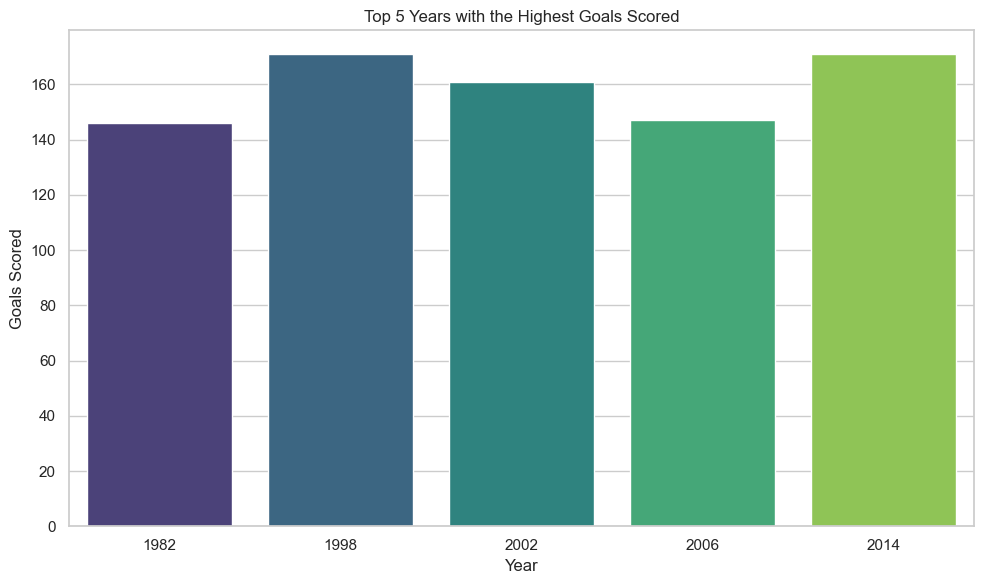

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_goals['Year'], y=top_goals['GoalsScored'], palette='viridis')
plt.title('Top 5 Years with the Highest Goals Scored')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.show()

**i-(f) Top Winning Teams**

In [133]:
win_counts = world_cups_df['Winner'].value_counts()
print(win_counts)

Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64


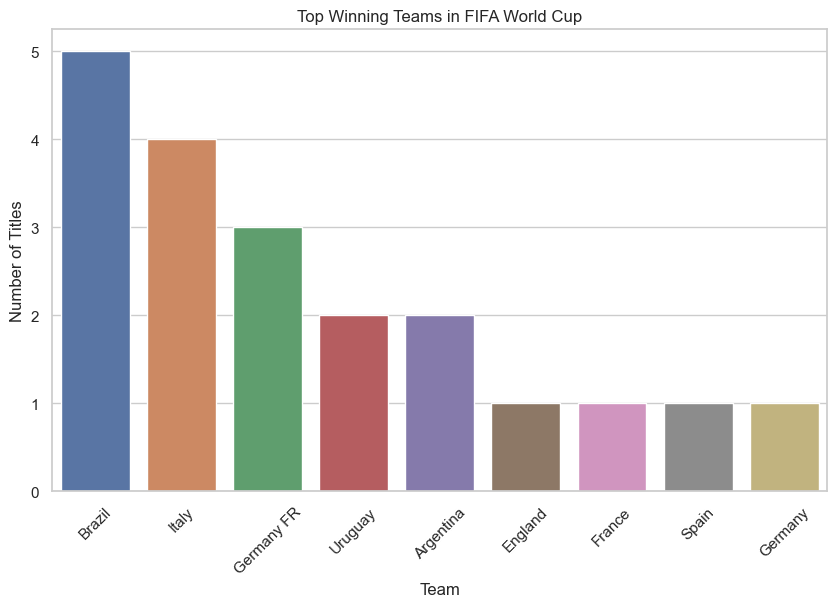

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_winning_teams.index, y=top_winning_teams.values)
plt.title('Top Winning Teams in FIFA World Cup')
plt.xlabel('Team')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

**i-(g) Success of Host Countries in World Cups**

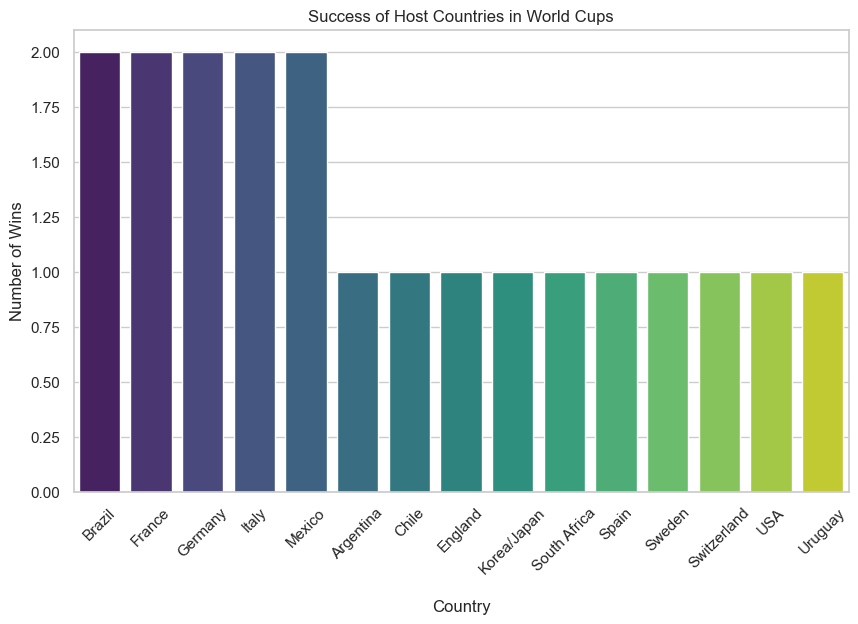

In [147]:
host_winner_success = world_cups_df.groupby('Country')['Winner'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=host_winner_success.index, y=host_winner_success.values, palette='viridis')
plt.title('Success of Host Countries in World Cups')
plt.xlabel('\nCountry')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

**i-(h) Qualified Teams Over the Years**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


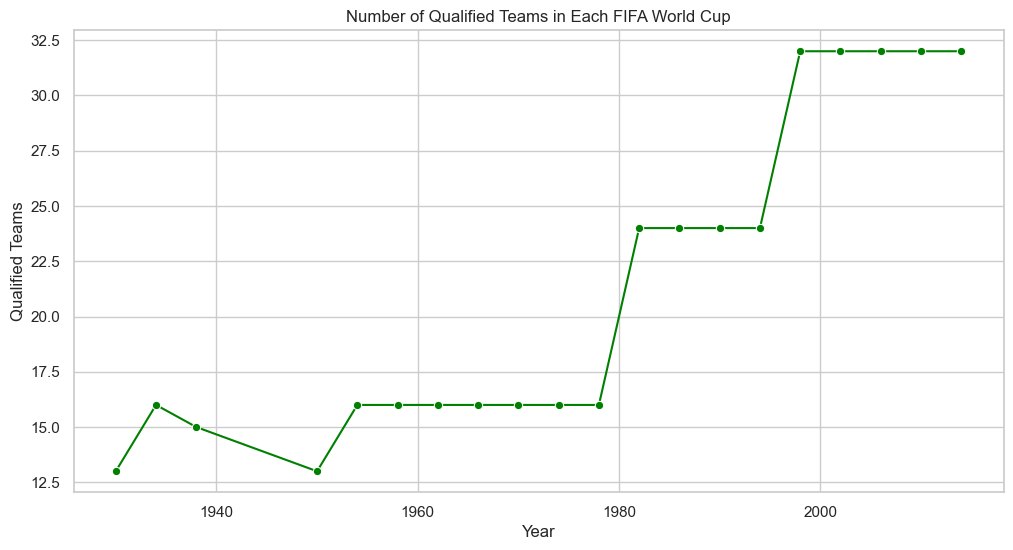

In [188]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups_df, x='Year', y='QualifiedTeams', marker='o', color='green')
plt.title('Number of Qualified Teams in Each FIFA World Cup')
plt.xlabel('Year')
plt.ylabel('Qualified Teams')
plt.grid(True)
plt.show()

**i-(i) Trend in Attendance Across Different World Cups**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


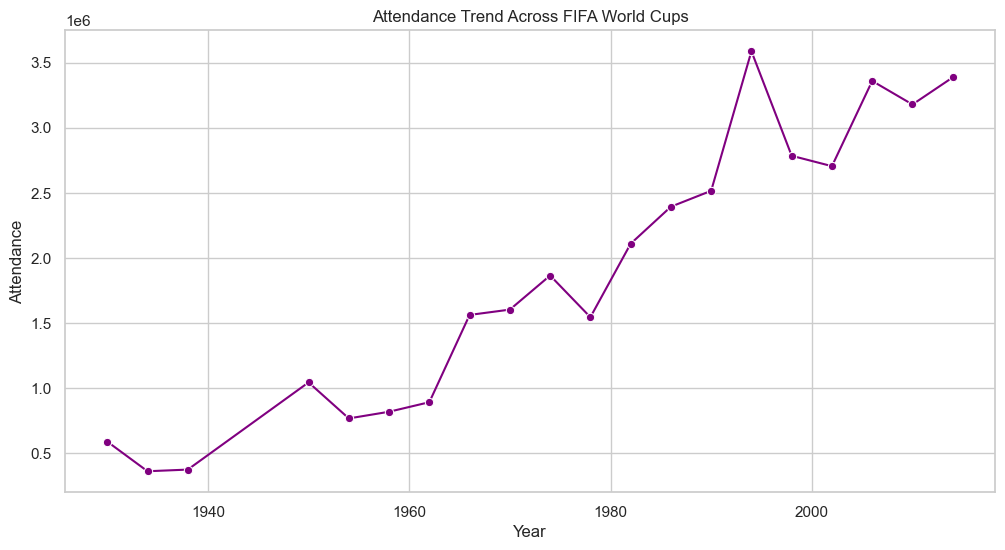

In [189]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups_df, x='Year', y='Attendance', marker='o', color='purple')
plt.title('Attendance Trend Across FIFA World Cups')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

#### (ii) In-depth Team and Player Analysis:

**ii-(a) Consistent Performers (Teams reaching finals)**

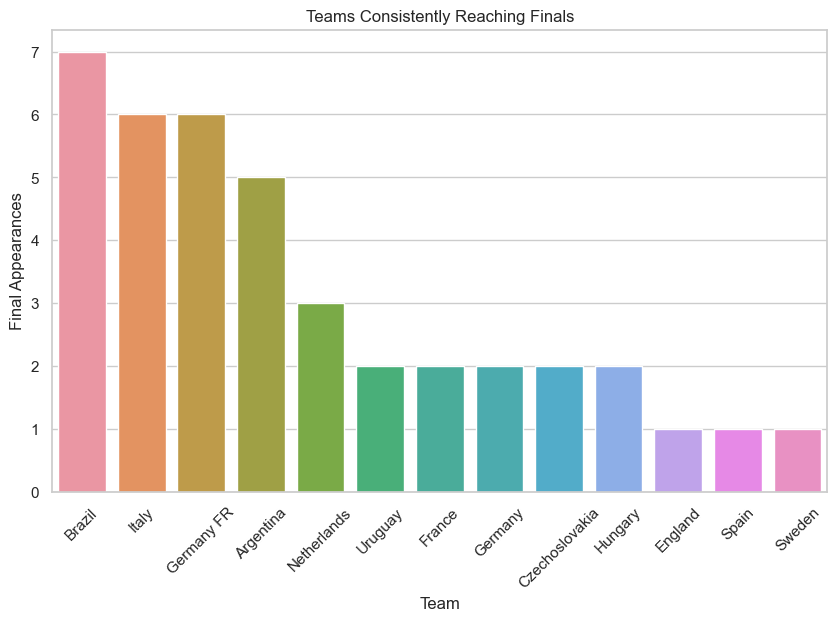

In [157]:
consistent_perf = pd.concat([world_cups_df['Winner'], world_cups_df['Runners-Up']]).value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=consistent_perf.index, y=consistent_perf.values)
plt.title('Teams Consistently Reaching Finals')
plt.xlabel('Team')
plt.ylabel('Final Appearances')
plt.xticks(rotation=45)
plt.show()

**ii-(a) Goals by players**

In [162]:
players_goals = world_cup_players_df[world_cup_players_df['Event'].str.startswith('G', na=False)]
top_scorers = players_goals['Player Name'].value_counts().head(10)
top_scorers

Player Name
RONALDO                               12
KLOSE                                 11
Uwe SEELER                             9
Helmut RAHN                            8
PEL� (Edson Arantes do Nascimento)     8
M�LLER                                 8
Grzegorz LATO                          8
JAIRZINHO                              8
Gerd MUELLER                           7
RIVELINO                               6
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


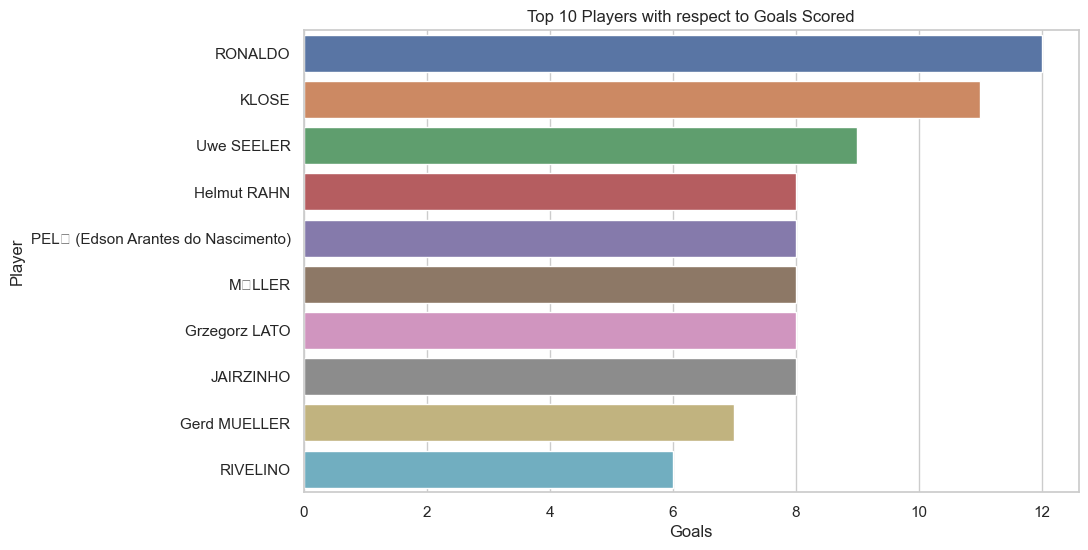

In [164]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, orient='h')
plt.title('Top 10 Players with respect to Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Player')
plt.show()

#### (iii) Goals and Performance Analysis:

**iii-(a) Goals Scored Over the Years**

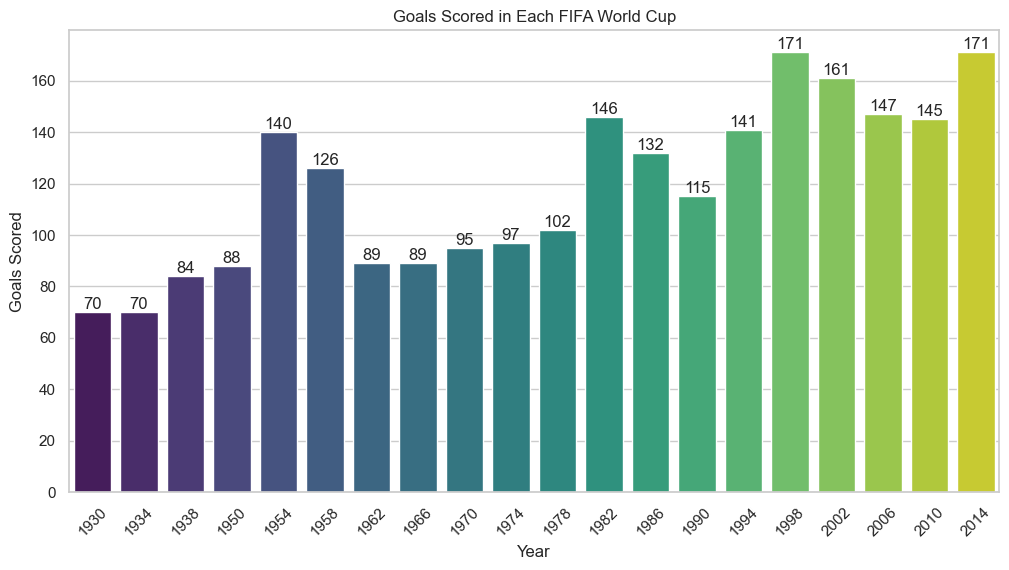

In [171]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=world_cups_df, x='Year', y='GoalsScored', palette='viridis')
plt.title('Goals Scored in Each FIFA World Cup')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Adding labels on top of the bars
for b in bars.patches:
    height = b.get_height()
    plt.text(
        b.get_x() + b.get_width() / 2,
        height,
        f'{int(height)}', 
        ha='center',
        va='bottom'
    )

plt.show()


**iii-(b) Distribution of Match Result**

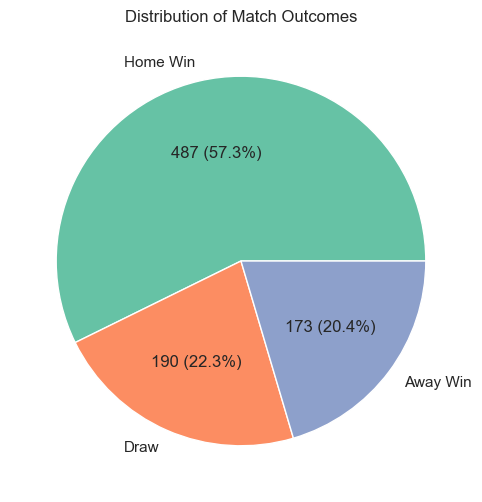

In [186]:
world_cup_matches_df['Outcome'] = world_cup_matches_df.apply(
    lambda row: 'Home Win' if row['Home Team Goals'] > row['Away Team Goals'] else (
        'Away Win' if row['Home Team Goals'] < row['Away Team Goals'] else 'Draw'
    ),
    axis=1
)

result_counts = world_cup_matches_df['Outcome'].value_counts()

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)'

colors = sns.color_palette('Set2', len(result_counts)) 
plt.figure(figsize=(8, 6))
plt.pie(result_counts, 
        labels=result_counts.index, 
        autopct=lambda pct: func(pct, result_counts),
        colors=colors)
plt.title('Distribution of Match Outcomes')
plt.show()

#### (iv) Attendance Analysis:

**iv-(a) Trend in Attendance Across Different World Cups over the Years**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


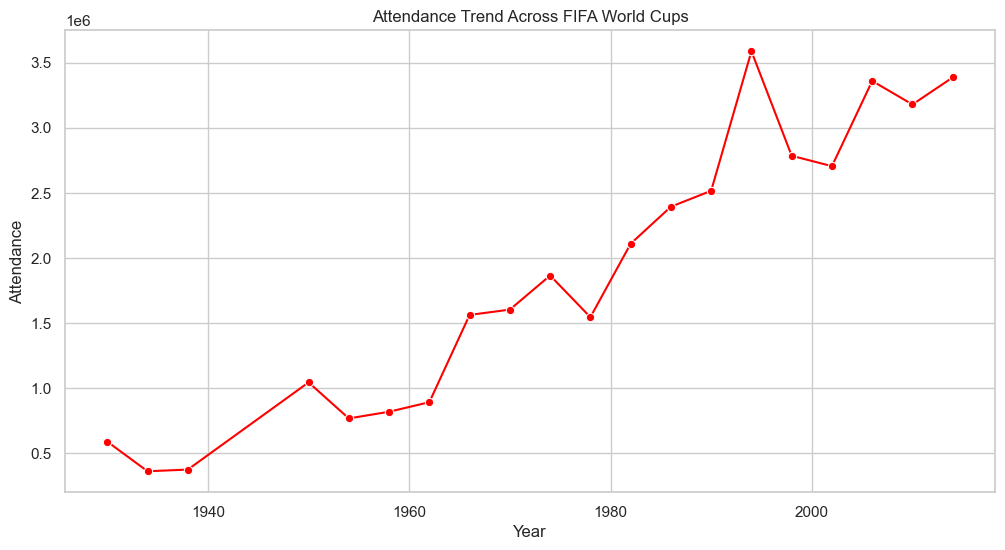

In [187]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_cups_df, x='Year', y='Attendance', marker='o', color='red')
plt.title('Attendance Trend Across FIFA World Cups')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()

**iv-(b) Attendance by Match Stage**

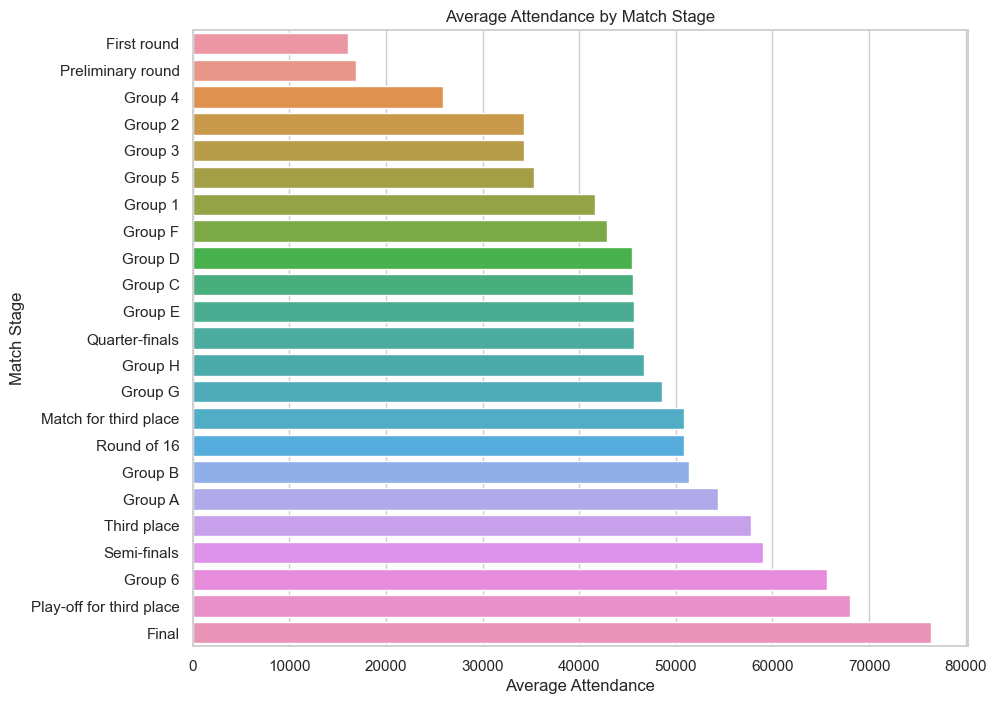

In [184]:
attendance_by_stage = world_cup_matches_df.groupby('Stage')['Attendance'].mean().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(y=attendance_by_stage.index, x=attendance_by_stage.values)
plt.title('Average Attendance by Match Stage')
plt.xlabel('Average Attendance')
plt.ylabel('Match Stage')
plt.show()

**iv-(c) Attendance by Host Country**

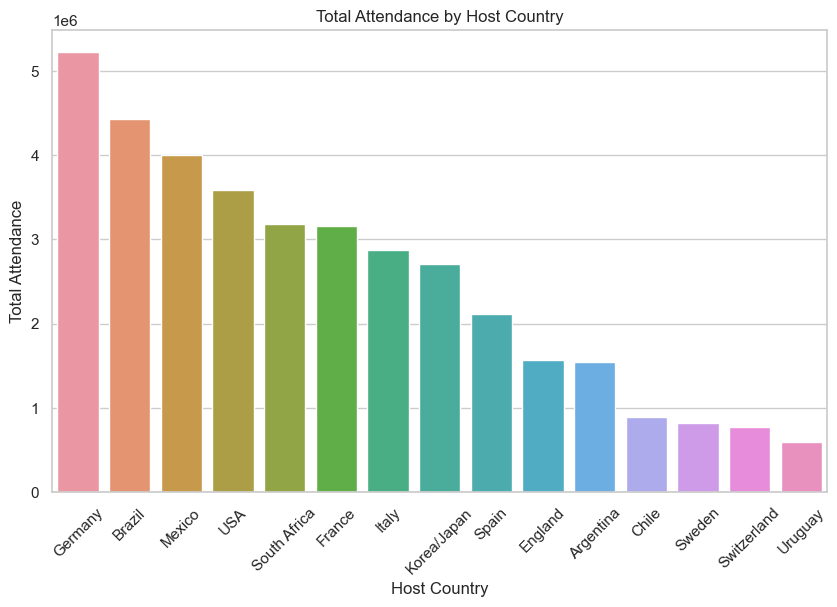

In [185]:
attendance_by_host_country = world_cups_df.groupby('Country')['Attendance'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=attendance_by_host_country.index, y=attendance_by_host_country.values)
plt.title('Total Attendance by Host Country')
plt.xlabel('Host Country')
plt.ylabel('Total Attendance')
plt.xticks(rotation=45)
plt.show()